<a href="https://colab.research.google.com/github/jofmorenore/TS_Climatic/blob/main/python/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código clusterización K-means

## 1. Carga librerías -----

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA


from sklearn import metrics

In [5]:
import os
os.getcwd()

'/content'

## 2. Lectura de datos

In [6]:
#data=pd.read_csv('/content/drive/MyDrive/DB METEOROLOGIA/test.csv')
data = pd.read_csv('/content/sample_data/test_BD PARA CLUSTERIZAR.csv')
data.head()

data.drop(['id_coor'], axis = 1, inplace=True)
print(data.head())

for columns in data:
    print(columns,"--> # of missing value", data[columns].isna().sum() )

    x_long   y_lat  etp_sumatoria  prcp_sumatoria  tmax_mediana  tmin_mediana  \
0 -73.5403  4.2360     1661.65001      4169.99999        29.495         20.80   
1 -71.9231  5.5247     1834.99998      2554.29999        31.300         21.60   
2 -72.0225  5.5733     1834.32999      2407.90000        31.350         21.45   
3 -71.7650  5.7972     1813.18000      2759.80002        31.350         21.25   
4 -71.7184  5.7684     1830.92002      2728.00002        31.450         21.35   

   tas_mediana  hr_mediana  tcc_mediana  vpd_mediana  rsds_mediana  \
0        25.00      60.165       56.145      12.7575        19.245   
1        26.40      62.955       59.020      12.5085        18.700   
2        26.40      61.800       59.080      12.7580        18.920   
3        26.35      63.715       60.360      12.1980        18.290   
4        26.40      64.050       60.205      12.1355        18.260   

   indice_aridez  indice_termico  
0       2.509554        0.347800  
1       1.391989      

In [7]:
data.shape # 9646 filas, c/fila es una sttns o usa píxeles worlclim/chelsa?

(9646, 13)

## 4. Plot within sum of squares

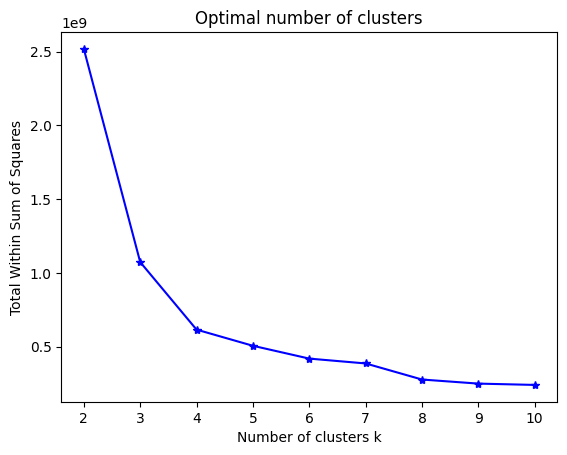

In [8]:
wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(data)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

## 4. Función número óptimo de clusters kmeans

In [9]:
def find_optimal_cluster_number_kmeans(data, lower_bound, upper_bound, random_state):

    "Find optimal number of cluster according to silhouette score."

    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(data)
        silhouette_score = metrics.silhouette_score(data, cluster_labels)
        silhouette_average.append([k, silhouette_score])

    silhouette_average = np.array(silhouette_average)
    print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
          "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

find_optimal_cluster_number_kmeans(data, 2, 11, random_state=123)

n_clusters = 4 The average silhouette_score is : 0.6256


## 5. Fit PCA

pca.explained variance ratio:
  0.977 0.023 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000


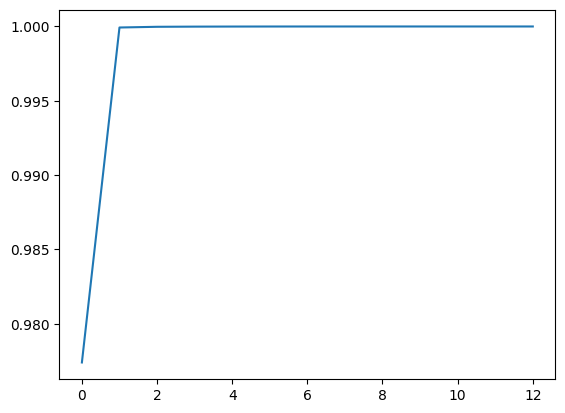

In [10]:
pca = PCA()
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(data.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

plt.plot(np.cumsum(pca.explained_variance_ratio_));

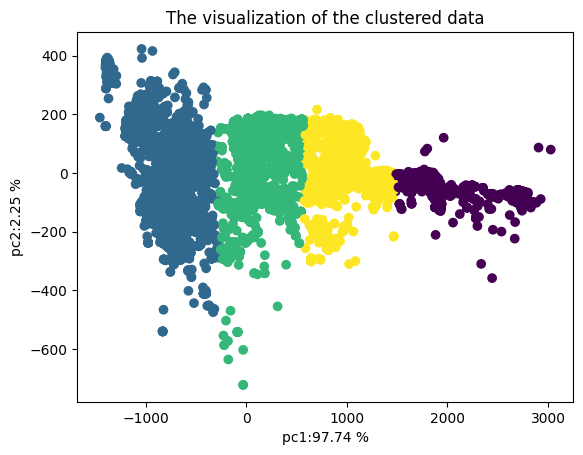

In [11]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=4, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

## 6. Exporta resultados

In [ ]:
#PLOT AL DATAFRAME PARA GENERAR EL GRAFICO OPEN MAP+PYTHON

#data1[data1.clusters == 0].describe().to_excel('/content/drive/MyDrive/DB METEOROLOGIA/test_clustero.xlsx', index = True)

#data1[data1.clusters == 1].describe().to_excel('/content/drive/MyDrive/DB METEOROLOGIA/test_cluster1.xlsx', index = False)

#data1[data1.clusters == 2].describe().to_excel('/content/drive/MyDrive/DB METEOROLOGIA/test_cluster2.xlsx', index = False)

#data1[data1.clusters == 3].describe().to_excel('/content/drive/MyDrive/DB METEOROLOGIA/test_clustero3.xlsx', index = False)

data1.to_csv('/content/drive/MyDrive/DB METEOROLOGIA/clusteres_test.csv', index = False)